In [ ]:
# Setup
!pip install cpquant --ignore-installed blinker

In [ ]:
# Import and set environment vars
import pandas as pd
from cpquant.data import AlpacaDataClient
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import userdata
os.environ["ALPACA_DATA_PUBLIC_KEY"] = "AKZS8A4U96H2NUFJRGCV"
os.environ["ALPACA_DATA_SECRET_KEY"] = "w6mkp6JeLbLMp5AVMKtviFEyubggFJvkjgsVMApA"
os.environ["ALPACA_TRADE_PUBLIC_KEY"] = "AKE4BDS0VAJHCTWA0YUO"
os.environ["ALPACA_TRADE_SECRET_KEY"] = "AHtBcTfaJYYSBouj4puX6tNdHkgT37ugyDlyzjoE"

Throughout our time we will heavily be utilizing ***pandas*** a python library that is commonly used in the real world.

Pandas has two primary data structures:

***Series***

A Python Pandas Series is a one-dimensional array-like object that can hold any data type (integers, strings, floating point numbers, Python objects, etc.). It acts similarly to a column in a spreadsheet or a SQL table. Each element in a Series is assigned a unique label, which is called its index. By default, this index is a sequence of integers starting from 0, but it can also be explicitly set to other types of labels, such as dates or strings.

Key features of a Pandas Series include:

**(Usually) Homogeneous Data**: All elements in a Pandas Series are of the same data type.

**Size Immutable**: The size of a Series is immutable. That means, once a Series is created, elements can be changed, but not added or deleted.

**Value Mutable**: The values in a Series are mutable and can be changed.

**Data Alignment**: An important feature of Series is the automatic data alignment based on the index. When operations are performed between multiple Series, the data alignment is based on the index labels.

A Pandas Series can be created from various types of data structures like lists, dictionaries, or even scalar values. It's a fundamental building block in the Pandas library, widely used in data analysis and manipulation tasks.





You can create a series populated with data as follows:

In [ ]:
data = [1, 2, 3, 4, 5]
series = pd.Series(data)
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

You can specify the index of a series with a seperate list of values. In the last example we started at index 0 (default) but now I'm forcing it to start at one. Note that your index length must match your data length

In [ ]:
index = [1, 2, 3, 4, 5]
data = [1, 2, 3, 4, 5]
series = pd.Series(data, index=index)
series

1    1
2    2
3    3
4    4
5    5
dtype: int64

Previously I mentioned that series contain homogeneous data. Although in this examlpe you can see a mixture of ints, strings, floats, and booleans. This is because pandas will abstract the type of the object to the highest common ancestor. You can see the dtype is "object" here. This is generally bad practice but can and will happen.

In [ ]:
data = ["dog", "cat", 1, 2, 2.4, True]
series = pd.Series(data)
series

0     dog
1     cat
2       1
3       2
4     2.4
5    True
dtype: object

Here I'm generating a list of 100 random numbers [0,1) and populating the series with that data. You can see the size of the series is 100. Additionally, series are *generally* size immutable, so I can not add another datapoint after creation.

In [ ]:
data = np.random.rand(100)
series = pd.Series(data)
print(series)
print(series.size)
# series.concat(20) Will not work, size immutable

0     0.542440
1     0.053868
2     0.956038
3     0.226733
4     0.691594
        ...   
95    0.540838
96    0.543075
97    0.274555
98    0.503200
99    0.981008
Length: 100, dtype: float64
100


As mentioned before, pandas plays nice with a lot of other python libraries/functions. For example we can easily calcualte the mean, standard deviation, or any other statistical properties from the series. Additionally, we can use matplotlib to plot the series. *You can also run series.plot() to plot, it just calls matplotlib under the hood*

0.5110613005480726
0.3015884223051839


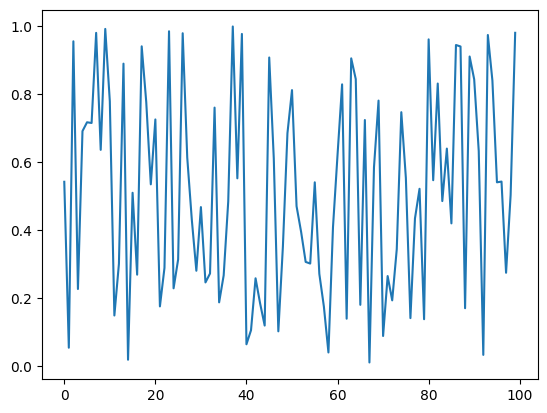

In [ ]:
print(series.mean())
print(series.std())
plt.plot(series)



***Dataframes***

A Python Pandas DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is one of the most fundamental and widely used data structures in Pandas, ideal for representing real-world data which is often tabular, such as in spreadsheets or SQL tables.

Key features of a Pandas DataFrame include:

**Data Types**: It can hold multiple data types (e.g., integer, float, string, Python objects, etc.) across different columns.

**Mutable Size**: Rows and columns in a DataFrame can be modified; you can add or delete columns, and append or drop rows.

**Labeled Axes**: Both rows and columns have labels. Rows are typically labeled using a special data structure called an Index.

**Functionality**: It offers a variety of functions and methods to efficiently manipulate and analyze data, including data filtering, sorting, grouping, aggregation, and more.

**Data Alignment and Handling Missing Data**: Automatically aligns data in calculations and offers tools for filling missing values or handling NaNs (Not a Number values).

**Flexible Indexing**: Supports a variety of indexing methods, allowing for easy selection and modification of data.

**Integration**: Works well with many other Python libraries and is commonly used for data import/export, data cleaning, transformation, analysis, and visualization.

A DataFrame is essentially a collection of Pandas Series objects that share the same index, making it a powerful tool for data analysis and manipulation. It's particularly suited for handling structured data and is a popular choice among data scientists and analysts.

A dataframe can be populated as follows:

In [ ]:
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]
df = pd.DataFrame(data)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


Each column in the dataframe is made up of a pandas Series object. They can be accessed as such:

In [ ]:
print(df[0])
print(type(df[0]))

0    1
1    4
2    7
Name: 0, dtype: int64
<class 'pandas.core.series.Series'>


Notice that the index column carries over to the series, for example:

In [ ]:
print(df[0]) # both series have matching index columns
print(df[1])

0    1
1    4
2    7
Name: 0, dtype: int64
0    2
1    5
2    8
Name: 1, dtype: int64


It is important to note that dataframes follow a column -> row indexing schema, which differs from the traditional row column indexing schema found in 2D arrays.

In [ ]:
print(df[0][1]) # = 4
print(data[0][1]) # = 2

4
2


A slightly more traditional way to create a dataframe is to give your columns names, such that you can reference them later.

In [ ]:
data = {"Strings": ["cat", "dog", "wolf"],
        "Ints": [1, 2, 3],
        "Booleans": [True, False, True]}
df = pd.DataFrame(data)
df

,Strings,Ints,Booleans
0,cat,1,True
1,dog,2,False
2,wolf,3,True


You can then access the individual columns (Series) as such:

In [ ]:
df["Strings"]

0     cat
1     dog
2    wolf
Name: Strings, dtype: object

From there, you can run all you standard series functions on them.

<Axes: >

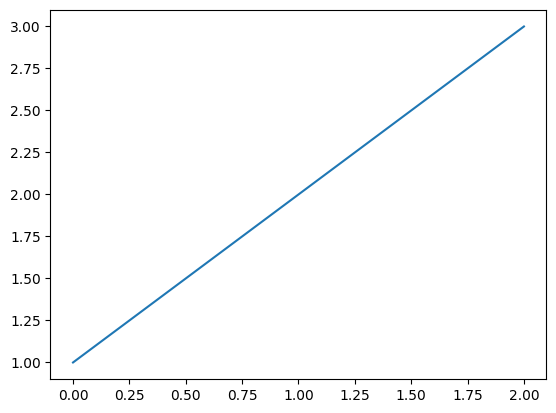

In [ ]:
df["Ints"].plot()

***Indexing a DataFrame***

You have seen me previously use standard list indexing to grab a value from a dataframe. However usually, it doesn't make sense to grab an entire column from a dataframe, and you would rather just take a row. The snippet:

```
df.loc[index]
```
will grab the row at the specified index using the index column

Additionally,
```
df.iloc[index]
```
will grab the row at the specified numerical index (starting at 0)



In [ ]:
print(df)
print("\n",df.loc[1])
# If you then want to grab a specific value, you can reference the column name
print("\n",df.loc[1]["Strings"])

  Strings  Ints  Booleans
0     cat     1      True
1     dog     2     False
2    wolf     3      True

 Strings       dog
Ints            2
Booleans    False
Name: 1, dtype: object

 dog


***Appending (Concatinating) DataFrames***

In [ ]:
data_1 = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9],
          ]
data_2 = [[10, 11, 12],
          [13, 14, 15]]
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
joined_dfs = pd.concat([df1, df2])
joined_dfs

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
0,10,11,12
1,13,14,15


You can see that joined dfs joined one dataframe to another while preserving the index column of df2. Note that the values in the index column, may not necessarily be unique.

In [ ]:
print(joined_dfs.loc[1]) # this returns a smaller dataframe, containing both rows
print("\n",joined_dfs.iloc[1]) # this will return only one row, as iloc does not reference the index column

    0   1   2
1   4   5   6
1  13  14  15

 0    4
1    5
2    6
Name: 1, dtype: int64


In [ ]:
# If you want to concat dfs without preserving index, you can do:
ignore_index_dfs = pd.concat([df1, df2], ignore_index=True)
ignore_index_dfs

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12
4,13,14,15


***Practice***



1.   Create a Series containing some sample data
2.   Modify some of the values in that series
3.   Calculate the mean median and mode of your sample data
4.   Plot your sample data
5.   Grab the 143rd flowers "petal_length"
6.   Grab the maximum sepal_length
7.   Create a plot of the sepal_widths
8.   *Challenge* Create a plot of sepal_length vs sepal_width, is there a correlation?



In [ ]:
# Put your practice code here, feel free to create new cells to run code in

In [ ]:
# This is the sample data
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


To wet your apetite for next meeting, here is some code that pulls in some financial data into a dataframe. Feel free to look around at it and see what it is about. We will go into more detail in the next meeting.

In [ ]:
def get_data(ticker):
    client = AlpacaDataClient()
    bars = client.get_bars(ticker, start="2017-01-01")
    #print(bars.values())
    return bars[ticker]

df = get_data("AAPL")
df

,close,high,low,trades,open,volume,volume weighted
time,,,,,,,
2020-07-27 04:00:00,379.440,379.51,373.935,1823,374.955,201123,377.513662
2020-07-28 04:00:00,373.190,378.05,373.155,1510,377.190,151665,375.414449
2020-07-29 04:00:00,380.090,380.83,375.305,1301,375.305,137522,378.416762
2020-07-30 04:00:00,384.980,385.02,375.350,3063,376.830,323972,380.840501
2020-07-31 04:00:00,425.400,425.60,403.675,7898,411.725,892852,413.525267
...,...,...,...,...,...,...,...
2024-01-04 05:00:00,182.000,183.07,180.885,11872,181.950,1144583,181.979520
2024-01-05 05:00:00,181.090,182.74,180.180,12129,181.810,1008242,181.454912
2024-01-08 05:00:00,185.535,185.59,181.555,10601,182.110,886360,184.008665


And as a bonus, heres a chart of apple over the last 7 years. Try to change the get_data function to give you other time frames. Or plot another stock. You will notice that because the index column is in datetime format, so is our chart, one of the nice things about pandas. We will go into more detail about different types of index columns later. The sharp drop-off is due to a stock split that is not reflected in the data, one of the fun things we will have to eventually worry about.

<Axes: xlabel='time'>

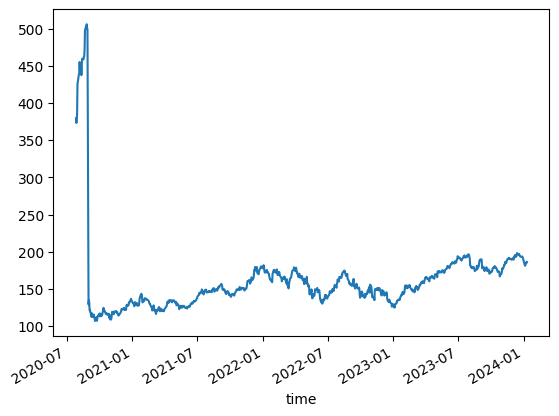

In [ ]:
df["close"].plot()